In [1]:
import pandas as pd
import numpy as np

In [2]:
%%time
colnames = ['id', 'c', 'w', 'd_c', 'd_w']
questions = pd.read_csv('./question_train_set.txt', sep='\t', names=colnames)

CPU times: user 43.1 s, sys: 12.4 s, total: 55.5 s
Wall time: 1min 2s


In [37]:
%%time
topics_info = pd.read_csv('./question_topic_train_set.txt', sep='\t', names=['q_id', 't_ids'])

CPU times: user 3.13 s, sys: 335 ms, total: 3.46 s
Wall time: 3.52 s


In [4]:
print(questions.iloc[1234])
print(topics.iloc[1234])

id                                   7652752442503357178
c      c1306,c2436,c1682,c110,c881,c564,c11,c139,c874...
w      w14970,w13797,w59605,w6,w1097,w27151,w10523,w1...
d_c    c41,c188,c190,c98,c101,c142,c147,c148,c147,c28...
d_w                                                  NaN
Name: 1234, dtype: object
q_id     7652752442503357178
t_ids    5587122886836885408
Name: 1234, dtype: object


In [5]:
%%time
chars = [c for cs in questions.c.astype('U') for c in cs.split(',')]

CPU times: user 8.41 s, sys: 3.07 s, total: 11.5 s
Wall time: 13.1 s


In [9]:
print(len(chars))
print(len(set(chars)))

67005492
9241


In [10]:
from collections import defaultdict

In [7]:
%%time
topics = [t.split(',') for t in topics.t_ids.astype('U')]
print(topics[0])

['7739004195693774975', '3738968195649774859']
CPU times: user 14.7 s, sys: 12.9 s, total: 27.6 s
Wall time: 33.8 s


In [15]:
questions.iloc[0]

id                                      6555699376639805223
c         c324,c39,c40,c155,c180,c180,c181,c17,c4,c1153,...
w         w305,w13549,w22752,w11,w7225,w2565,w1106,w16,w...
d_c       c335,c101,c611,c189,c97,c144,c147,c101,c15,c76...
d_w       w231,w54,w1681,w54,w11506,w5714,w7,w54,w744,w1...
topics           [7739004195693774975, 3738968195649774859]
Name: 0, dtype: object

In [11]:
from tqdm import tqdm
from collections import defaultdict

In [8]:
%%time
chars = [c.split(',') for c in questions.c.astype('U')]

CPU times: user 18.7 s, sys: 48.9 s, total: 1min 7s
Wall time: 1min 22s


In [9]:
print(len(topics))
print(len(chars))

2999967
2999967


In [14]:
%%time
topic_words = defaultdict(lambda: [])
for i in tqdm(range(len(topics))):
    for t in topics[i]:
        topic_words[t].extend(chars[i])

100%|██████████| 2999967/2999967 [00:18<00:00, 161008.18it/s]

CPU times: user 8.04 s, sys: 8.38 s, total: 16.4 s
Wall time: 18.6 s


In [15]:
print(len(topic_words['7739004195693774975']))

54731


In [16]:
import sys
print(sys.getsizeof(topic_words))
len(topic_words.keys())

73832


1999

In [17]:
topics = topic_words.keys()
Word_Vectors = []
for t in tqdm(topics):
    Word_Vectors.append(' '.join(topic_words[t]))

100%|██████████| 1999/1999 [00:22<00:00, 90.54it/s] 


In [18]:
len(Word_Vectors[0])

262964

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
count_vec = CountVectorizer()

In [20]:
%%time
Word_Count = count_vec.fit_transform(Word_Vectors)

CPU times: user 1min 39s, sys: 3.89 s, total: 1min 43s
Wall time: 1min 47s


In [21]:
Word_Count.shape

(1999, 9241)

In [22]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer()

In [23]:
%%time
Word_tfidf = tfidf.fit_transform(Word_Count)

CPU times: user 137 ms, sys: 46.9 ms, total: 184 ms
Wall time: 225 ms


In [24]:
from sklearn.neighbors import LSHForest
lshf = LSHForest(n_estimators=30)

In [25]:
%%time
lshf.fit(Word_tfidf)

CPU times: user 3.22 s, sys: 61 ms, total: 3.28 s
Wall time: 3.36 s


LSHForest(min_hash_match=4, n_candidates=50, n_estimators=30, n_neighbors=5,
     radius=1.0, radius_cutoff_ratio=0.9, random_state=None)

In [26]:
X_kd = []
for i in range(1999):
    X_kd.append(Word_tfidf[i])

In [27]:
lshf.kneighbors(X_kd[99])

(array([[ 0.        ,  0.03770064,  0.13315507,  0.15221052,  0.15311017]]),
 array([[  99, 1115,  181,  567,  340]]))

In [29]:
print(chars[0])

['c324', 'c39', 'c40', 'c155', 'c180', 'c180', 'c181', 'c17', 'c4', 'c1153', 'c396', 'c324', 'c2', 'c183', 'c49', 'c864', 'c28', 'c85', 'c2095', 'c11', 'c591', 'c441', 'c2114', 'c218', 'c184', 'c518', 'c197', 'c57', 'c17', 'c4', 'c768', 'c769', 'c184']


In [30]:
%%time
titles_c = [' '.join(c) for c in chars]

CPU times: user 2.67 s, sys: 5.89 s, total: 8.55 s
Wall time: 11 s


In [31]:
%%time
Title_counts = count_vec.transform(titles_c)
Title_tfidf = tfidf.transform(Title_counts)

CPU times: user 1min 11s, sys: 4.08 s, total: 1min 15s
Wall time: 1min 17s


In [32]:
Title_tfidf.shape

(2999967, 9241)

In [35]:
lshf.kneighbors(Title_tfidf[0])
# (array([[ 0.7458829 ,  0.74771425,  0.75860983,  0.76099354,  0.76237584]]),
#  array([[951,   6,  11, 945,   9]]))
# (array([[ 0.75400866,  0.75927334,  0.76099004,  0.76099354,  0.76398319]]),
#  array([[ 207, 1269,  917,  945, 1358]]))

(array([[ 0.32776265,  0.34782979,  0.38380304,  0.39366238,  0.40853938]]),
 array([[251, 161, 266, 132, 907]]))

In [39]:
print(topics_info.iloc[0].t_ids)
topics = list(topics)
print(topics[251], topics[161], topics[262], topics[132], topics[907])

7739004195693774975,3738968195649774859
-7149588690342184679 -7986077887193730895 -8252369929269451135 4978402514041141532 2027693463582123305


In [46]:
result = []
for i in tqdm(range(1000)):
    _, index = lshf.kneighbors(Title_tfidf[i])
    result.append(list(map(lambda i: topics[i], index[0])))
print(result[0])

100%|██████████| 1000/1000 [01:36<00:00, 10.38it/s]

['-7149588690342184679', '-7986077887193730895', '-9191306710136658354', '4978402514041141532', '2027693463582123305']


In [42]:
y_train = [t.split(',') for t in topics_info.t_ids.astype('U')]

In [43]:
print(y_train[0])
print(result[0])

['7739004195693774975', '3738968195649774859']
['-7149588690342184679', '-7986077887193730895', '-9191306710136658354', '4978402514041141532', '2027693463582123305']


In [44]:
from evaluate import evaluate

In [47]:
evaluate(zip(result, y_train[:1000]))

(0.2300745973081729, 0.8208300379291684, 0.31967905405405406, 757, 2368)

## Refine Points

1. speed up, 10.38it/s is too slow
2. high scole, 0.23...

In [49]:
char_list = [c for cs in questions.c.astype('U') for c in cs.split(',')]

In [50]:
from collections import Counter

In [51]:
%%time
char_count = Counter(char_list)

CPU times: user 9.62 s, sys: 5.13 s, total: 14.8 s
Wall time: 18 s


In [55]:
import matplotlib.pyplot as plt

In [56]:
%matplotlib inline

<Container object of 490 artists>

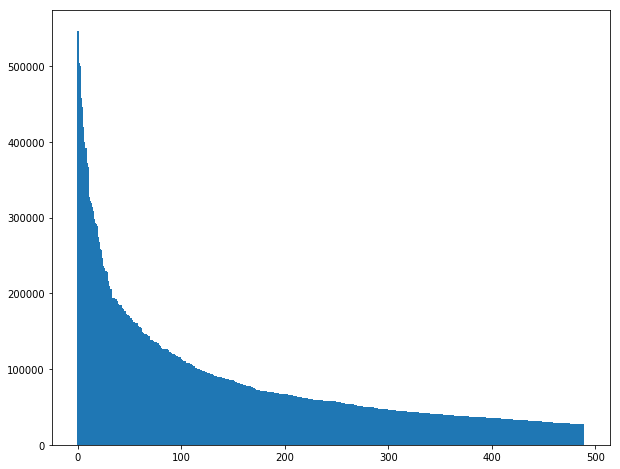

In [74]:
labels, counts = zip(*char_count.most_common(500)[10:])
figsize = (10, 8)
plt.figure(figsize=figsize)
plt.bar(range(len(labels)), counts, width=1)

In [65]:
%%time
char_most_common = char_count.most_common()

CPU times: user 5.73 ms, sys: 1.87 ms, total: 7.61 ms
Wall time: 10.3 ms


In [68]:
print(len(char_most_common))
print(char_most_common[:10])
print(char_most_common[-10:])

9241
[('c184', 2976601), ('c11', 2107917), ('c17', 1474831), ('c769', 1268907), ('c4', 947074), ('c57', 902857), ('c768', 748251), ('c2', 659270), ('c85', 558395), ('c518', 552882)]
[('c11443', 1), ('c10471', 1), ('c15201', 1), ('c12311', 1), ('c7764', 1), ('c5745', 1), ('c6973', 1), ('c10012', 1), ('c16360', 1), ('c18377', 1)]


In [69]:
count = 0
for i in char_most_common:
    if i[1] <= 5:
        count += 1
print(count)

3024


In [81]:
char_filter = []
for i in char_most_common:
    if i[1] <= 5 or i[1] > 558395:
        char_filter.append(i[0])
print(len(char_filter))

3032


In [80]:
Title_counts.getrow(1)

<1x9241 sparse matrix of type '<class 'numpy.int64'>'
	with 28 stored elements in Compressed Sparse Row format>

In [100]:
%%time
char_count_vec = CountVectorizer(stop_words=char_filter)
Char_count = char_count_vec.fit_transform(Word_Vectors)

CPU times: user 1min 50s, sys: 3.98 s, total: 1min 54s
Wall time: 1min 56s


In [101]:
Char_count.shape

(1999, 6209)

In [102]:
char_tfidf = TfidfTransformer()
Char_tfidf = char_tfidf.fit_transform(Char_count)

In [103]:
Char_tfidf.shape

(1999, 6209)

In [104]:
char_lshf = LSHForest(n_estimators=30)
char_lshf.fit(Char_tfidf)

LSHForest(min_hash_match=4, n_candidates=50, n_estimators=30, n_neighbors=5,
     radius=1.0, radius_cutoff_ratio=0.9, random_state=None)

In [105]:
char_lshf.kneighbors(Char_tfidf[2])

(array([[ 0.        ,  0.11079399,  0.19536532,  0.25468778,  0.39709228]]),
 array([[   2,  971,  972, 1697,  948]]))

In [106]:
%%time
char_title_counts = char_count_vec.transform(titles_c)
char_title_tfidf = char_tfidf.transform(char_title_counts)
print(char_title_tfidf.shape)

(2999967, 6209)
CPU times: user 1min 15s, sys: 2.28 s, total: 1min 17s
Wall time: 1min 18s


In [109]:
result = []
for i in tqdm(range(1000)):
    _, index = char_lshf.kneighbors(char_title_tfidf[i])
    result.append(list(map(lambda i: topics[i], index[0])))
print(result[0])

100%|██████████| 1000/1000 [01:36<00:00, 10.32it/s]

['-7149588690342184679', '7739004195693774975', '7259175568841790177', '-7986077887193730895', '3738968195649774859']


In [111]:
evaluate(zip(result, y_train[:1000]))

(0.25160186392368006, 0.894390547400969, 0.3500844594594595, 829, 2368)

In [116]:
%%time
_, indx = char_lshf.kneighbors(char_title_tfidf[:1000])

CPU times: user 57.2 s, sys: 10.5 s, total: 1min 7s
Wall time: 1min 8s


## Pipeline

In [117]:
from sklearn.pipeline import Pipeline
lshf_pp = Pipeline([('vect', CountVectorizer()),
                    ('tfidf', TfidfTransformer()),
                    ('lshf', LSHForest())])

In [123]:
topic_count = Counter([t for ts in topics_info.t_ids.astype('U') for t in ts.split(',')])

In [124]:
topic_most_common = topic_count.most_common()

In [135]:
def percent(most_common, num):
    total = sum([i[1] for i in most_common])
    occupy = sum([i[1] for i in most_common[:num]])
    return occupy/total
print(percent(topic_most_common, 10))
print(percent(topic_most_common, 100))
print(percent(topic_most_common, 1000))
print(percent(topic_most_common, 1999))

0.05882026271759638
0.2512836139688868
0.7177926026129365
1.0


In [136]:
topic_most_common[1]

('4697014490911193675', 49428)